# Dataset

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import sys
import os
import datetime

import altair as alt
alt.renderers.enable('notebook')

from PIL import Image

from dotenv import load_dotenv

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
sys.path.append("../Library/")
import deep_learning as dl
import image_manipulation as ima
import machine_learning as ml

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
def print_time(string=''):
    print('', str(datetime.datetime.today())[:22], string)
    return

In [7]:
categories = ["forest-woodland", "agriculture", "shrubland-grassland", "semi-desert"]
labels = [0, 1, 2]

## 0.3m

Shape of df_images: (2220, 5)
Distribution of categories and labels:
                category  label  counts
0           agriculture      0       1
1           agriculture      1       1
2           agriculture      2     417
3       forest-woodland      0     335
4       forest-woodland      1      44
5       forest-woodland      2     107
6           semi-desert      0     304
7           semi-desert      1      67
8           semi-desert      2     231
9   shrubland-grassland      0     415
10  shrubland-grassland      1      84
11  shrubland-grassland      2     214

Distribution of labels:
    label  counts
0      0    1055
1      1     196
2      2     969


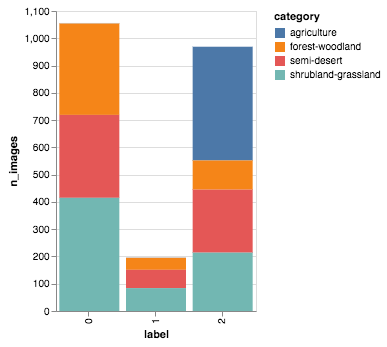

In [8]:
BASE_RES = 0.3
base_folder = os.getenv('GDRIVE_FOLDER') + "MFP - Satellogic/images/usgs_512_res" + str(BASE_RES) + "m"

df_images = pd.DataFrame(columns = ['filename', 'image', 'resolution', 'label', 'category'])
for category in categories:
    for label in labels:
        df = ima.load_images_into_df_by_category_and_label(base_folder, category, label)
        df_images = df_images.append(df)    

print("Shape of df_images:", df_images.shape)
print("Distribution of categories and labels:\n", df_images.groupby(['category', 'label']).size().reset_index(name='counts'))
print("\nDistribution of labels:\n", df_images.groupby(['label']).size().reset_index(name='counts'))

df_images_counts = df_images.groupby(['category', 'label']).size().reset_index(name='n_images')
alt.Chart(df_images_counts, width=200).mark_bar().encode(
    x='label:N',
    y='n_images:Q',
    color='category:N'
)

## 1m

Shape of df_images: (1366, 5)
Distribution of categories and labels:
                category  label  counts
0           agriculture      0       4
1           agriculture      1       2
2           agriculture      2     134
3       forest-woodland      0     241
4       forest-woodland      1      39
5       forest-woodland      2     175
6           semi-desert      0     248
7           semi-desert      1      13
8           semi-desert      2     169
9   shrubland-grassland      0     174
10  shrubland-grassland      2     167

Distribution of labels:
    label  counts
0      0     667
1      1      54
2      2     645


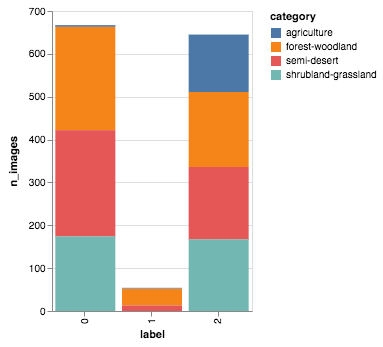

In [11]:
BASE_RES = 1
base_folder = os.getenv('GDRIVE_FOLDER') + "MFP - Satellogic/images/usgs_512_res" + str(BASE_RES) + "m"

df_images = pd.DataFrame(columns = ['filename', 'image', 'resolution', 'label', 'category'])
for category in categories:
    for label in labels:
        df = ima.load_images_into_df_by_category_and_label(base_folder, category, label)
        df_images = df_images.append(df)    

print("Shape of df_images:", df_images.shape)
print("Distribution of categories and labels:\n", df_images.groupby(['category', 'label']).size().reset_index(name='counts'))
print("\nDistribution of labels:\n", df_images.groupby(['label']).size().reset_index(name='counts'))

df_images_counts = df_images.groupby(['category', 'label']).size().reset_index(name='n_images')
alt.Chart(df_images_counts, width=200).mark_bar().encode(
    x='label:N',
    y='n_images:Q',
    color='category:N'
)

## Matplotlib

[66, 39, 79]
[71, 41, 140]


IndexError: list index out of range

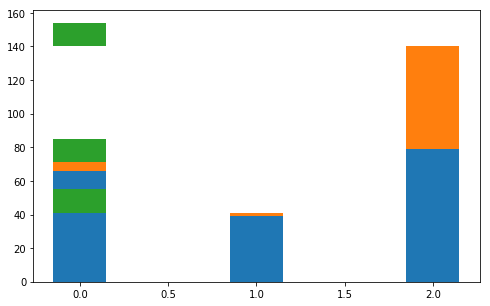

In [36]:
df_images_counts = df_images.groupby(['category', 'label']).size().reset_index(name='n_images')

fig, ax = plt.subplots()
fig.set_size_inches(8,5)
width = 0.3

bottom_vals = [0 for x in labels]
for category in categories:
    labels = df_images_counts[df_images_counts["category"] == category]["label"].tolist()
    vals = df_images_counts[df_images_counts["category"] == category]["n_images"].tolist()
    plt.bar(labels, vals, width, bottom=bottom_vals, label=category)
    bottom_vals = [bottom_vals[i] + vals[i] for i in range(len(bottom_vals))]
    print(bottom_vals)
    
    
ax.set(
    xlabel="Label",
    ylabel="Image count",
    title = "Dataset balance"
)
#ax.grid()
ax.legend()

plt.show()